In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.simulator_trend_testing import SimulatorSampledArrival
from tqdm.notebook import tqdm

In [2]:
# %%timeit
# 
# sim = Simulator(num_agents=66, sim_time=60000, lam=1e-4, mean=1e7, r=.05, shock_var=1e6)
# sim.run()

In [3]:
%%time
surpluses = []

for _ in tqdm(range(100)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=12000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(11396.8584)
CPU times: user 11.6 s, sys: 3.63 s, total: 15.2 s
Wall time: 2.22 s


In [4]:
surpluses

[tensor(813.0963),
 tensor(291.6085),
 tensor(483.5026),
 tensor(459.3750),
 tensor(529.7661),
 tensor(578.6075),
 tensor(421.9732),
 tensor(156.5309),
 tensor(235.9474),
 tensor(333.6800),
 tensor(762.1813),
 tensor(550.4937),
 tensor(690.6586),
 tensor(533.4119),
 tensor(337.5036),
 tensor(543.0751),
 tensor(536.9567),
 tensor(519.7426),
 tensor(372.5947),
 tensor(146.1175),
 tensor(414.8227),
 tensor(347.5646),
 tensor(251.4480),
 tensor(353.6226),
 tensor(742.4153),
 tensor(506.3975),
 tensor(382.5135),
 tensor(468.0865),
 tensor(408.4498),
 tensor(552.2900),
 tensor(369.4048),
 tensor(516.5577),
 tensor(477.9159),
 tensor(307.5949),
 tensor(603.3619),
 tensor(480.2343),
 tensor(366.7356),
 tensor(470.6647),
 tensor(461.0793),
 tensor(500.9023),
 tensor(517.8956),
 tensor(515.1151),
 tensor(449.3405),
 tensor(591.7635),
 tensor(335.0027),
 tensor(234.0643),
 tensor(436.2946),
 tensor(344.3630),
 tensor(367.1713),
 tensor(639.2545),
 tensor(708.1383),
 tensor(475.5460),
 tensor(685.

In [5]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=24000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=1e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(14329.7041)
CPU times: user 47min 11s, sys: 12min, total: 59min 12s
Wall time: 8min 3s


In [6]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=1000, 
                                  lam=5e-3, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e5, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(10839.7383)
CPU times: user 14min 45s, sys: 3min 31s, total: 18min 16s
Wall time: 2min 25s


98720.796875


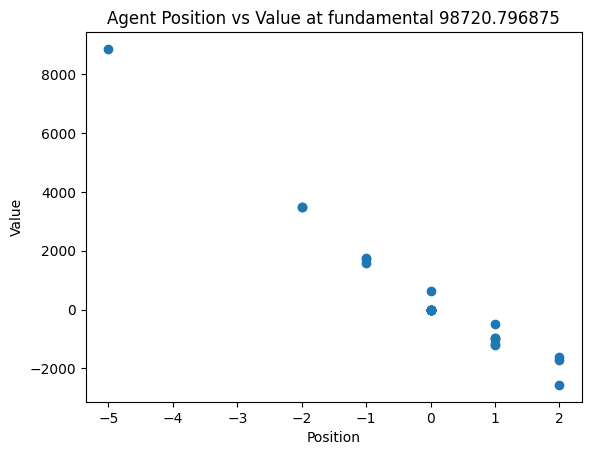

In [7]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


97220.203125


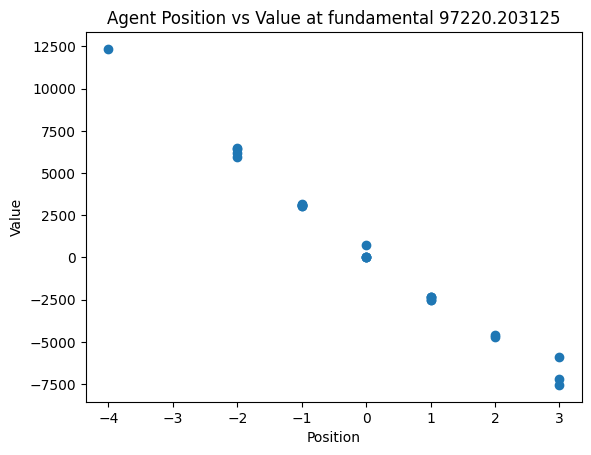

In [8]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


103123.8125


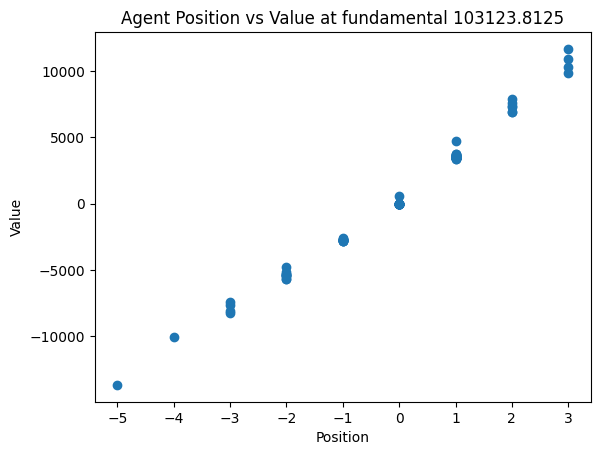

In [9]:
sim = SimulatorSampledArrival(num_background_agents=100, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()
